<a href="https://colab.research.google.com/github/zubinsharma17/Mental-Fitness-Tracker/blob/main/Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import plotly.express  as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle
warnings.filterwarnings("ignore")

In [185]:
main_df=pd.read_csv('mental-disorders-countrywise.csv')
df = main_df.copy()
df

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                                  1.70                                                
1                                                  1.73                                                
2                                                  1.79                                                
3                                                  1.78                                                
4                                                  1.71                                                
...                                                 ...                                                
6835                                               2.19                                                
6836                                               2.28                                                
6837                                               2.36                                                
6838                                               2.47                                                
6839                                               2.53                                                

[6840 rows x 4 columns]

In [186]:
type(df)

pandas.core.frame.DataFrame

In [187]:
len(df)

6840

To Check Duplicated Values

In [188]:
df.duplicated().sum()

0

In [189]:
df.columns

Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

In [190]:
print('.: Data set information :.')
print('*' * 20)
print(' The Total number of rows are :' , df.shape[0])
print('The total number of Columns are : ', df.shape[1])
print('*' * 20)
print('/n')
print('The Whole information : ', df.info())
print(df.info(memory_usage= False))

.: Data set information :.
********************
 The Total number of rows are : 6840
The total number of Columns are :  4
********************
/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   

In [191]:
df.head(5)

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                                
2                                               1.79                                                
3                                               1.78                                                
4                                               1.71

In [192]:
df.tail(5)

Entity Code  Year  \
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
6835                                               2.19                                                
6836                                               2.28                                                
6837                                               2.36                                                
6838                                               2.47                                                
6839                                               2.53

In [193]:
df.describe()

Year  \
count  6840.000000   
mean   2004.500000   
std       8.656074   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
count                                        6840.000000                                                
mean                                            4.818070                                                
std                                             2.294064                                                
min                                             0.220000                                                
25%                                             3.010000                                                
50%                                             4.680000                                                
75%                                             6.390000                                                
max                                            13.760000

In [194]:
df.describe(include= object)

Entity  Code
count          6840  6150
unique          228   205
top     Afghanistan   AFG
freq             30    30

In [195]:
df= df.replace("DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent) , DALYs")

to check null values in the dataset.

In [196]:
df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [197]:
df.Entity.unique()

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'East Timor', 'Eastern Mediterranean Region (WHO)', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', '

In [198]:
df.corr

<bound method DataFrame.corr of            Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                                  1.70                                                
1                                                  1.73                                                
2                                                  1.79                                                
3                                                  1.78                                                
4                                                  1.71        

In [199]:
df['Entity'].value_counts()

Afghanistan                 30
North Macedonia             30
Northern Mariana Islands    30
Norway                      30
OECD Countries              30
                            ..
Grenada                     30
Guam                        30
Guatemala                   30
Guinea                      30
Zimbabwe                    30
Name: Entity, Length: 228, dtype: int64

In [200]:
df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].value_counts()

4.59    22
4.68    21
5.74    19
4.35    19
4.47    19
        ..
8.51     1
9.82     1
9.81     1
9.72     1
9.20     1
Name: DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent), Length: 974, dtype: int64

In [201]:
df.Code.unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI',
       'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', '

Data Visualization starts from here.

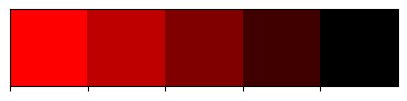

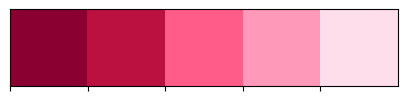

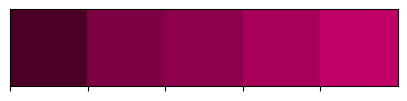

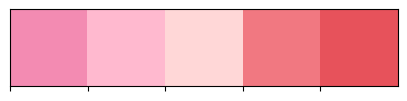

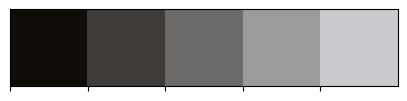

In [202]:
# Making Color Paltte for better visualization
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# Plot Color Palletes
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)


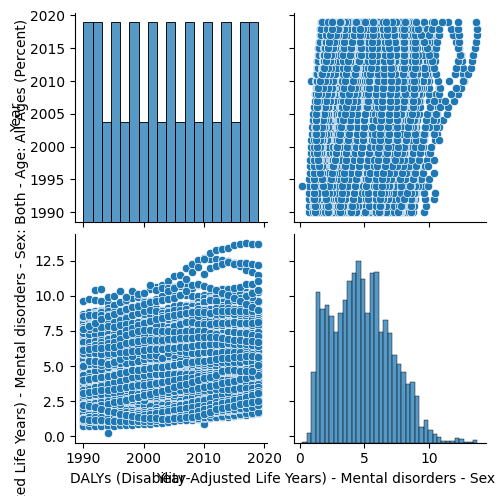

In [203]:
sns.pairplot(df)

In [204]:
plt.figure(figsize=(150,200))
sns.barplot(data = df, y = "Entity" ,x = "DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)" )

<Axes: xlabel='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)', ylabel='Entity'>

<Axes: >

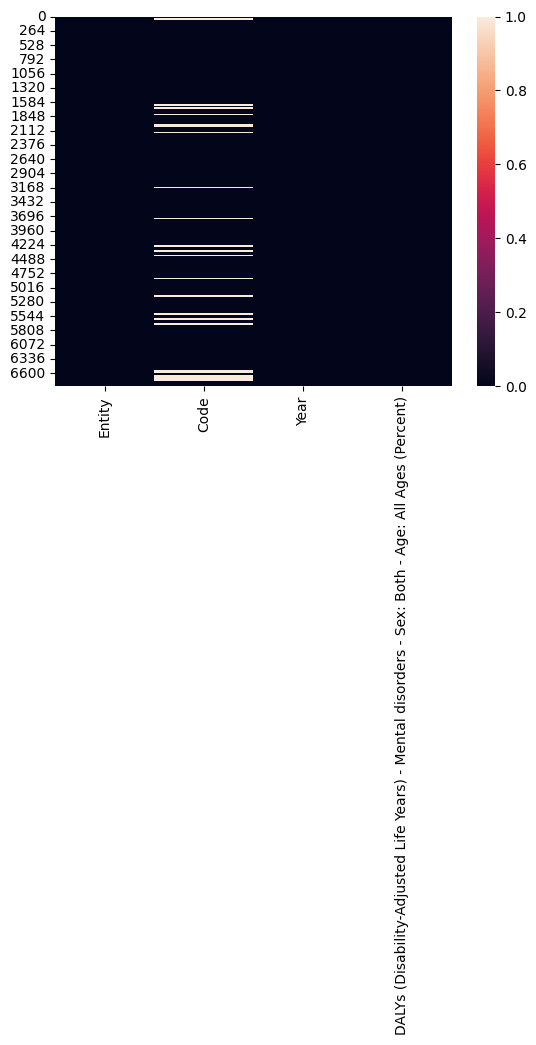

In [205]:
sns.heatmap(df.isnull())


<Axes: >

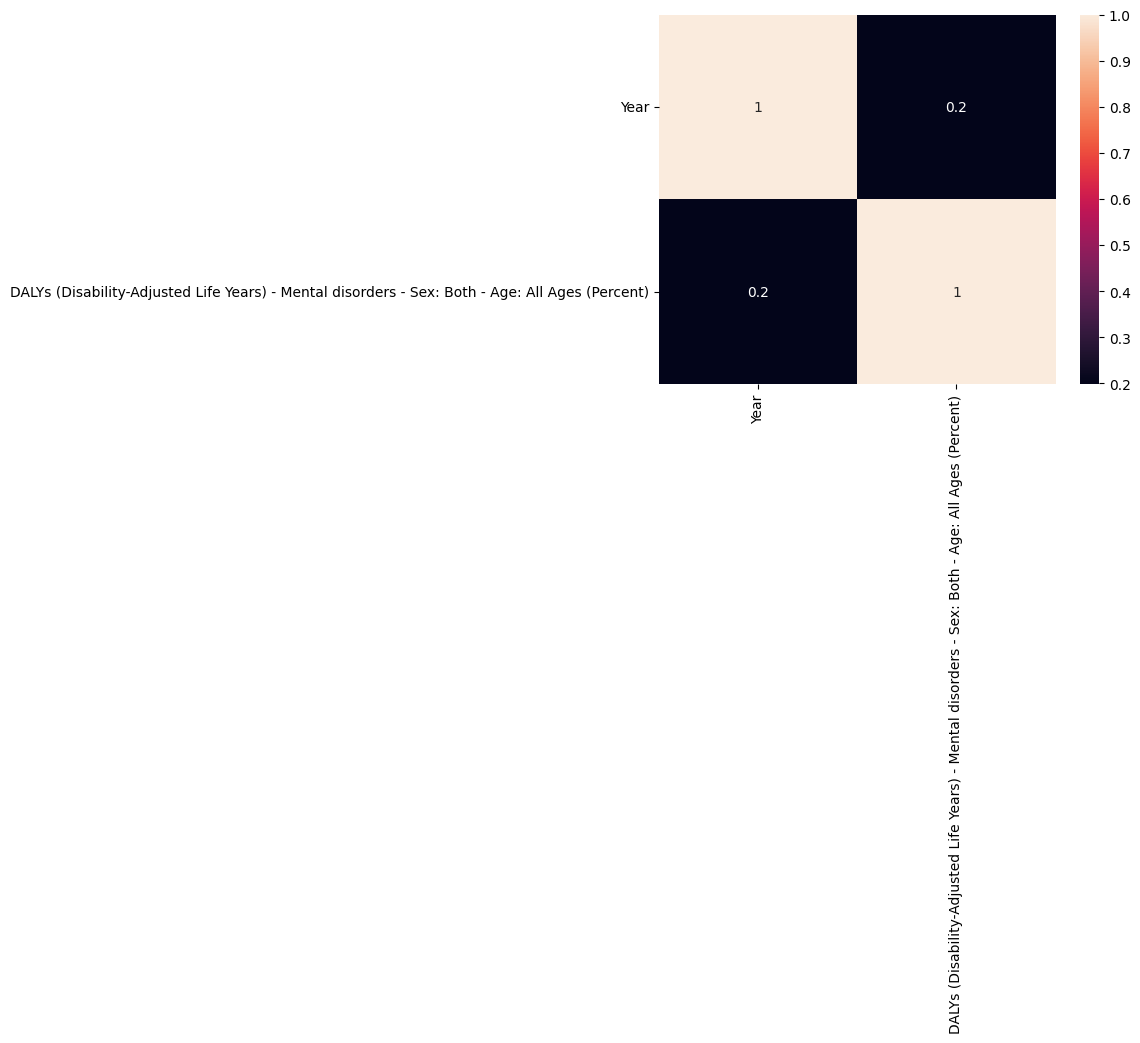

In [206]:
sns.heatmap(df.corr(), annot = True)


******************************
.: Countries :.
******************************


Afghanistan                 30
North Macedonia             30
Northern Mariana Islands    30
Norway                      30
OECD Countries              30
                            ..
Grenada                     30
Guam                        30
Guatemala                   30
Guinea                      30
Zimbabwe                    30
Name: Entity, Length: 228, dtype: int64

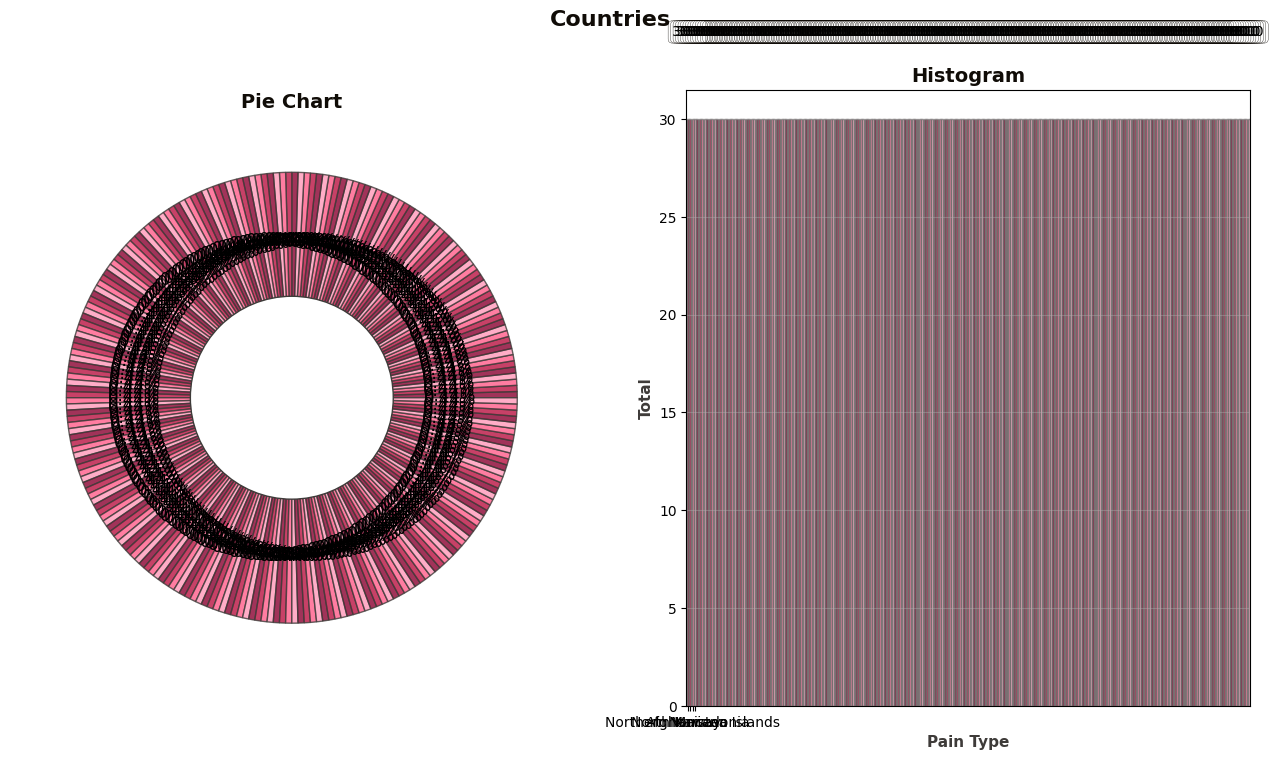

In [207]:
colors=pink_grad[0:4]
order=df['Entity'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Countries', fontweight='heavy', fontsize=16,
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Entity'].value_counts(), colors=colors, pctdistance=0.7,
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
ax = sns.countplot(x='Entity', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Year', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',
           color=black_grad[1])
plt.xticks([0, 1, 2, 3])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Countries :.'+'\033[0m')
print('*' * 30)
df.Entity.value_counts(dropna=False)

In [208]:
px.bar(df, x="Entity", y="DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)", color="Year", title="Total disorders as per each Country : ")

In [209]:
px.scatter(df, x='Code',y='Year', color=df['Entity'])

In [210]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
    locations='Entity',
    color='Year',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [211]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
    locations='Entity',
    color='Code',
    color_continuous_scale='Blues'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [212]:
px.density_heatmap(df, y="DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)", x="Entity", nbinsx=20, nbinsy=20,color_continuous_scale='Inferno_r')

In [213]:
px.density_heatmap(df, y="DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)", x="Entity", marginal_x="histogram", marginal_y="histogram",color_continuous_scale=px.colors.sequential.Viridis_r)

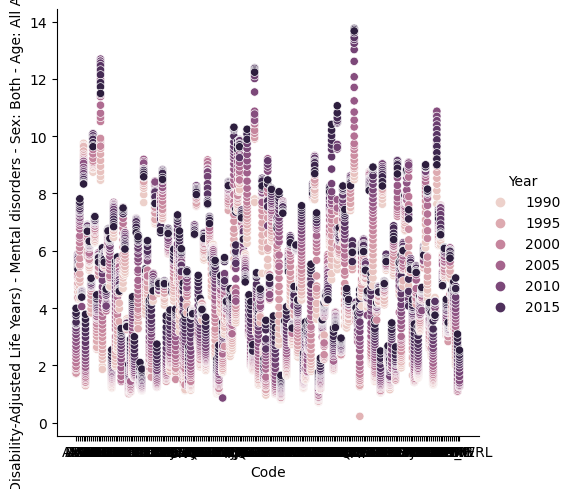

In [214]:
sns.relplot(x = 'Code', y ='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)', hue = 'Year', data = df)

In [215]:
total_effected = sum(df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'])
total_effected

32955.60000000002

In [216]:
total_population =78884000000
Disorder_Percentage = (total_effected/total_population)*100
Disorder_Percentage

4.17772932407079e-05

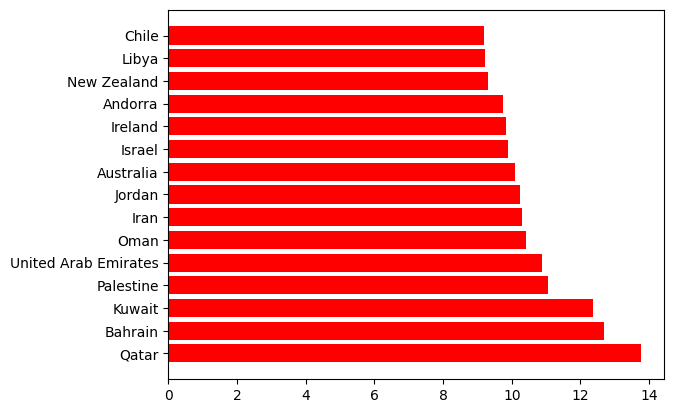

In [217]:
df2= df.sort_values( by = 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)' , ascending = False ).head(200)
x= df2['Entity']
y= df2['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
plt.barh(x, y ,color = 'red')
plt.show()

In [218]:
df2

Entity Code  Year  \
4827                 Qatar  QAT  2017   
4828                 Qatar  QAT  2018   
4826                 Qatar  QAT  2016   
4829                 Qatar  QAT  2019   
4825                 Qatar  QAT  2015   
...                    ...  ...   ...   
2749                  Iran  IRN  2009   
6298  United Arab Emirates  ARE  2018   
158                Andorra  AND  1998   
4101           New Zealand  NZL  2011   
1126                 Chile  CHL  2006   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
4827                                              13.76                                                
4828                                              13.72                                                
4826                                              13.69                                                
4829                                              13.67                                                
4825                                              13.61                                                
...                                                 ...                                                
2749                                               9.21                                                
6298                                               9.20                                                
158                                                9.19                                                
4101                                               9.19                                                
1126                                               9.19                                                

[200 rows x 4 columns]

In [219]:
main_uf=pd.read_csv('every_mental_disorder_countrywise.csv')
uf = main_uf.copy()
uf

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
7105     Zimbabwe  ZWE  2015   
7106     Zimbabwe  ZWE  2016   
7107     Zimbabwe  ZWE  2017   
7108     Zimbabwe  ZWE  2018   
7109     Zimbabwe  ZWE  2019   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.223206                                   
1                                              0.222454                                   
2                                              0.221751                                   
3                                              0.220987                                   
4                                              0.220183                                   
...                                                 ...                                   
7105                                           0.201042                                   
7106                                           0.201319                                   
7107                                           0.201639                                   
7108                                           0.201976                                   
7109                                           0.202482                                   

      Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.703023                             
1                                              0.702069                             
2                                              0.700792                             
3                                              0.700087                             
4                                              0.699898                             
...                                                 ...                             
7105                                           0.538596                             
7106                                           0.538593                             
7107                                           0.538589                             
7108                                           0.538585                             
7109                                           0.538580                             

      Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.127700                            
1                                              0.123256                            
2                                              0.118844                            
3                                              0.115089                            
4                                              0.111815                            
...                                                 ...                            
7105                                           0.095652                            
7106                                           0.096662                            
7107                                           0.097330                            
7108                                           0.097909                            
7109                                           0.098295                            

      Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              4.713314                             
1                                              4.702100                             
2                                              4.683743                             
3                                              4.673549                             
4                                              4.670810                       

In [220]:
len(uf)

7110

In [221]:
uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 10 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             7110 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               7110 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float64
 5   Eating disorders (share of population) - Sex: Both - Age: Age-standardized         6420 non-null   float

In [222]:
uf.describe()

Year  \
count  7110.00000   
mean   2004.50000   
std       8.65605   
min    1990.00000   
25%    1997.00000   
50%    2004.50000   
75%    2012.00000   
max    2019.00000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                                   
mean                                            0.266604                                   
std                                             0.039383                                   
min                                             0.188416                                   
25%                                             0.242267                                   
50%                                             0.273477                                   
75%                                             0.286575                                   
max                                             0.462045                                   

       Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                             
mean                                            0.636968                             
std                                             0.233391                             
min                                             0.181667                             
25%                                             0.520872                             
50%                                             0.579331                             
75%                                             0.844406                             
max                                             1.506730                             

       Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                            
mean                                            0.195664                            
std                                             0.138380                            
min                                             0.044780                            
25%                                             0.096416                            
50%                                             0.144150                            
75%                                             0.251167                            
max                                             1.031688                            

       Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                             
mean                                            4.101840                             
std                                             1.050543                             
min                                             1.879996                             
25%                                             3.425846                             
50%                                             3.939547                             
75%                                             4.564164                             
max                                             8.624634                             

       Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
count                                        6840.000000                               
mean                                            0.746728                               
std                                             0.463010                               
min                                             0.230000                               
25%                                             0.420000                               
50%                                             0.650000                               
75%                                             0.890000      

In [223]:
uf.corr()

Year  \
Year                                                1.000000   
Schizophrenia disorders (share of population) -...  0.024728   
Bipolar disorders (share of population) - Sex: ...  0.003478   
Eating disorders (share of population) - Sex: B...  0.076266   
Anxiety disorders (share of population) - Sex: ...  0.029486   
Prevalence - Drug use disorders - Sex: Both - A...  0.053186   
Depressive disorders (share of population) - Se... -0.049007   
Prevalence - Alcohol use disorders - Sex: Both ... -0.006851   

                                                    Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
Year                                                                                         0.024728                                   
Schizophrenia disorders (share of population) -...                                           1.000000                                   
Bipolar disorders (share of population) - Sex: ...                                           0.121542                                   
Eating disorders (share of population) - Sex: B...                                           0.500656                                   
Anxiety disorders (share of population) - Sex: ...                                           0.304149                                   
Prevalence - Drug use disorders - Sex: Both - A...                                           0.633833                                   
Depressive disorders (share of population) - Se...                                          -0.474994                                   
Prevalence - Alcohol use disorders - Sex: Both ...                                           0.285937                                   

                                                    Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
Year                                                                                         0.003478                             
Schizophrenia disorders (share of population) -...                                           0.121542                             
Bipolar disorders (share of population) - Sex: ...                                           1.000000                             
Eating disorders (share of population) - Sex: B...                                           0.677927                             
Anxiety disorders (share of population) - Sex: ...                                           0.576230                             
Prevalence - Drug use disorders - Sex: Both - A...                                           0.355834                             
Depressive disorders (share of population) - Se...                                           0.153039                             
Prevalence - Alcohol use disorders - Sex: Both ...                                           0.308149                             

                                                    Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
Year                                                                                         0.076266                            
Schizophrenia disorders (share of population) -...                                           0.500656                            
Bipolar disorders (share of population) - Sex: ...                                           0.677927                            
Eating disorders (share of population) - Sex: B...                                           1.000000                            
Anxiety disorders (share of population) - Sex: ...                                           0.594511                            
Prevalence - Drug use disorders - Sex: Both - A...                                           0.662455                            
Depressive disorders (share of population) - Se...                                          -0.052067                            
Prevalence - Alcohol use 

# **Preparing The Dataset For Regression**

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [225]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

numeric_columns = uf.select_dtypes(include=[np.number]).columns
uf[numeric_columns] = uf[numeric_columns].fillna(uf[numeric_columns].mean())

In [226]:
df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
uf['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = uf['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
uf['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = uf['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
uf['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = uf['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
uf['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = uf['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
uf['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = uf['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
uf['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = uf['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
uf['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = uf['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

In [227]:
merged_df = pd.merge(df, uf, on=['Entity', 'Code', 'Year'])

In [228]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


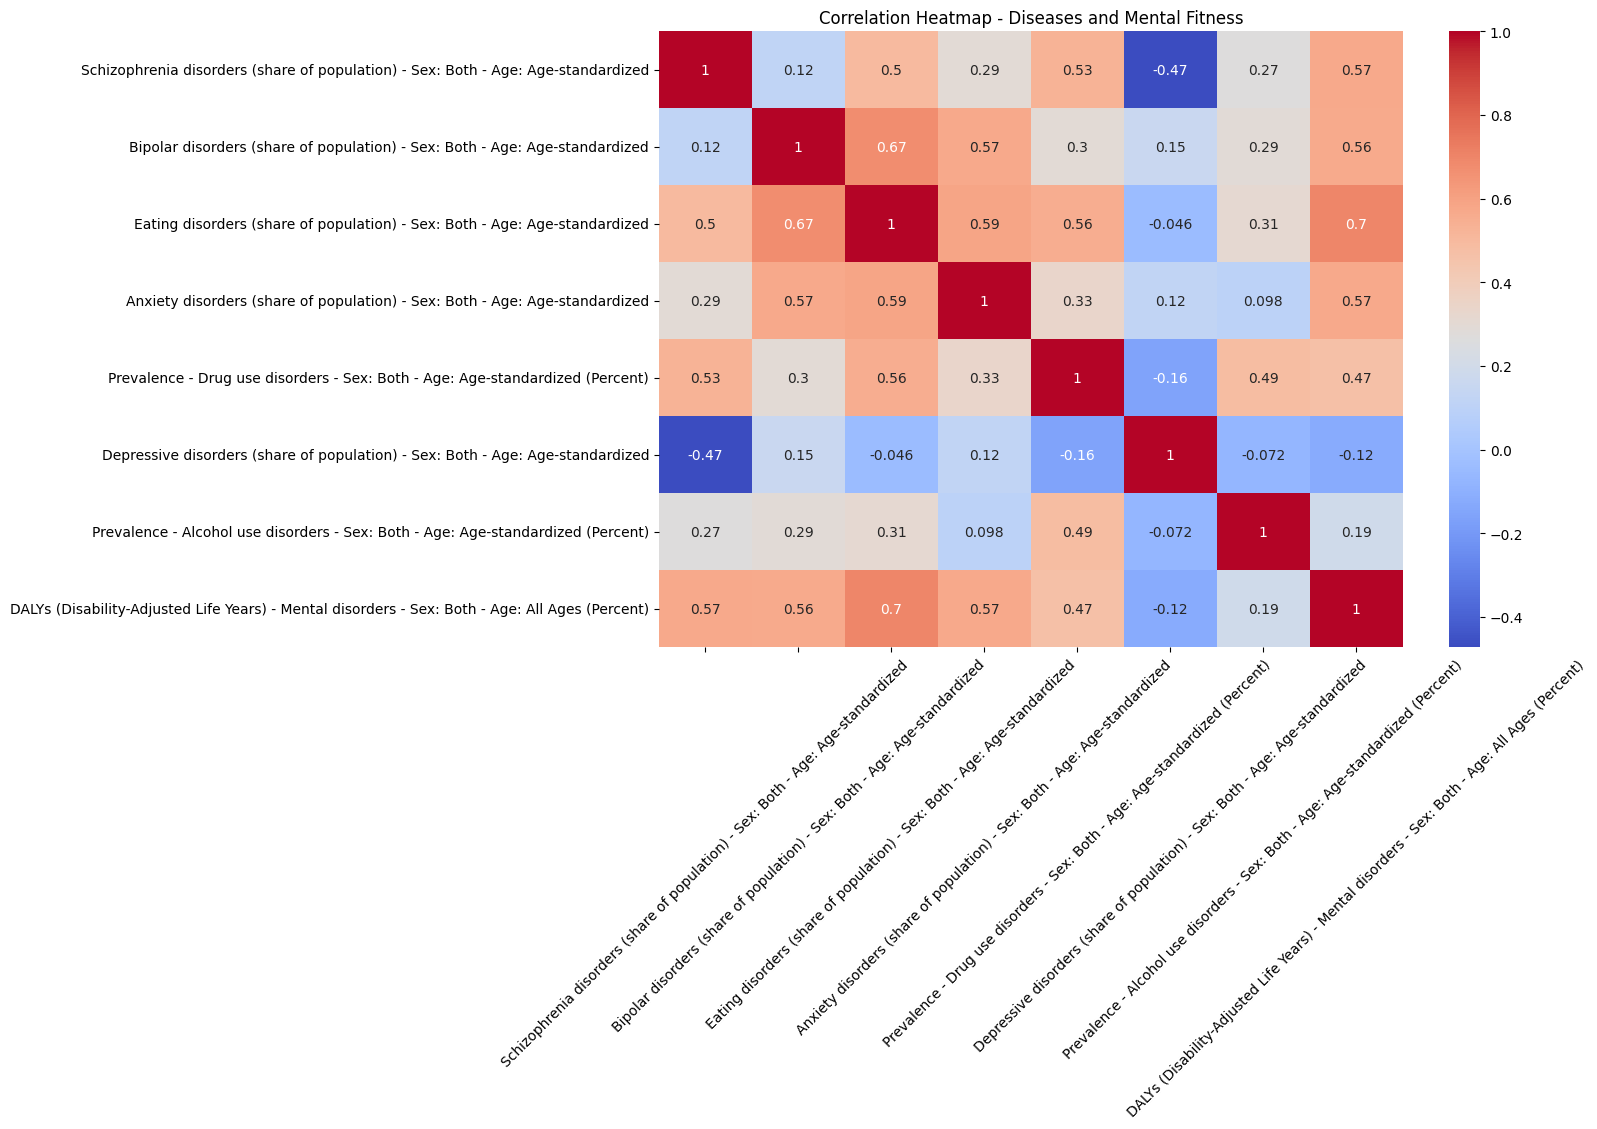

In [230]:
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

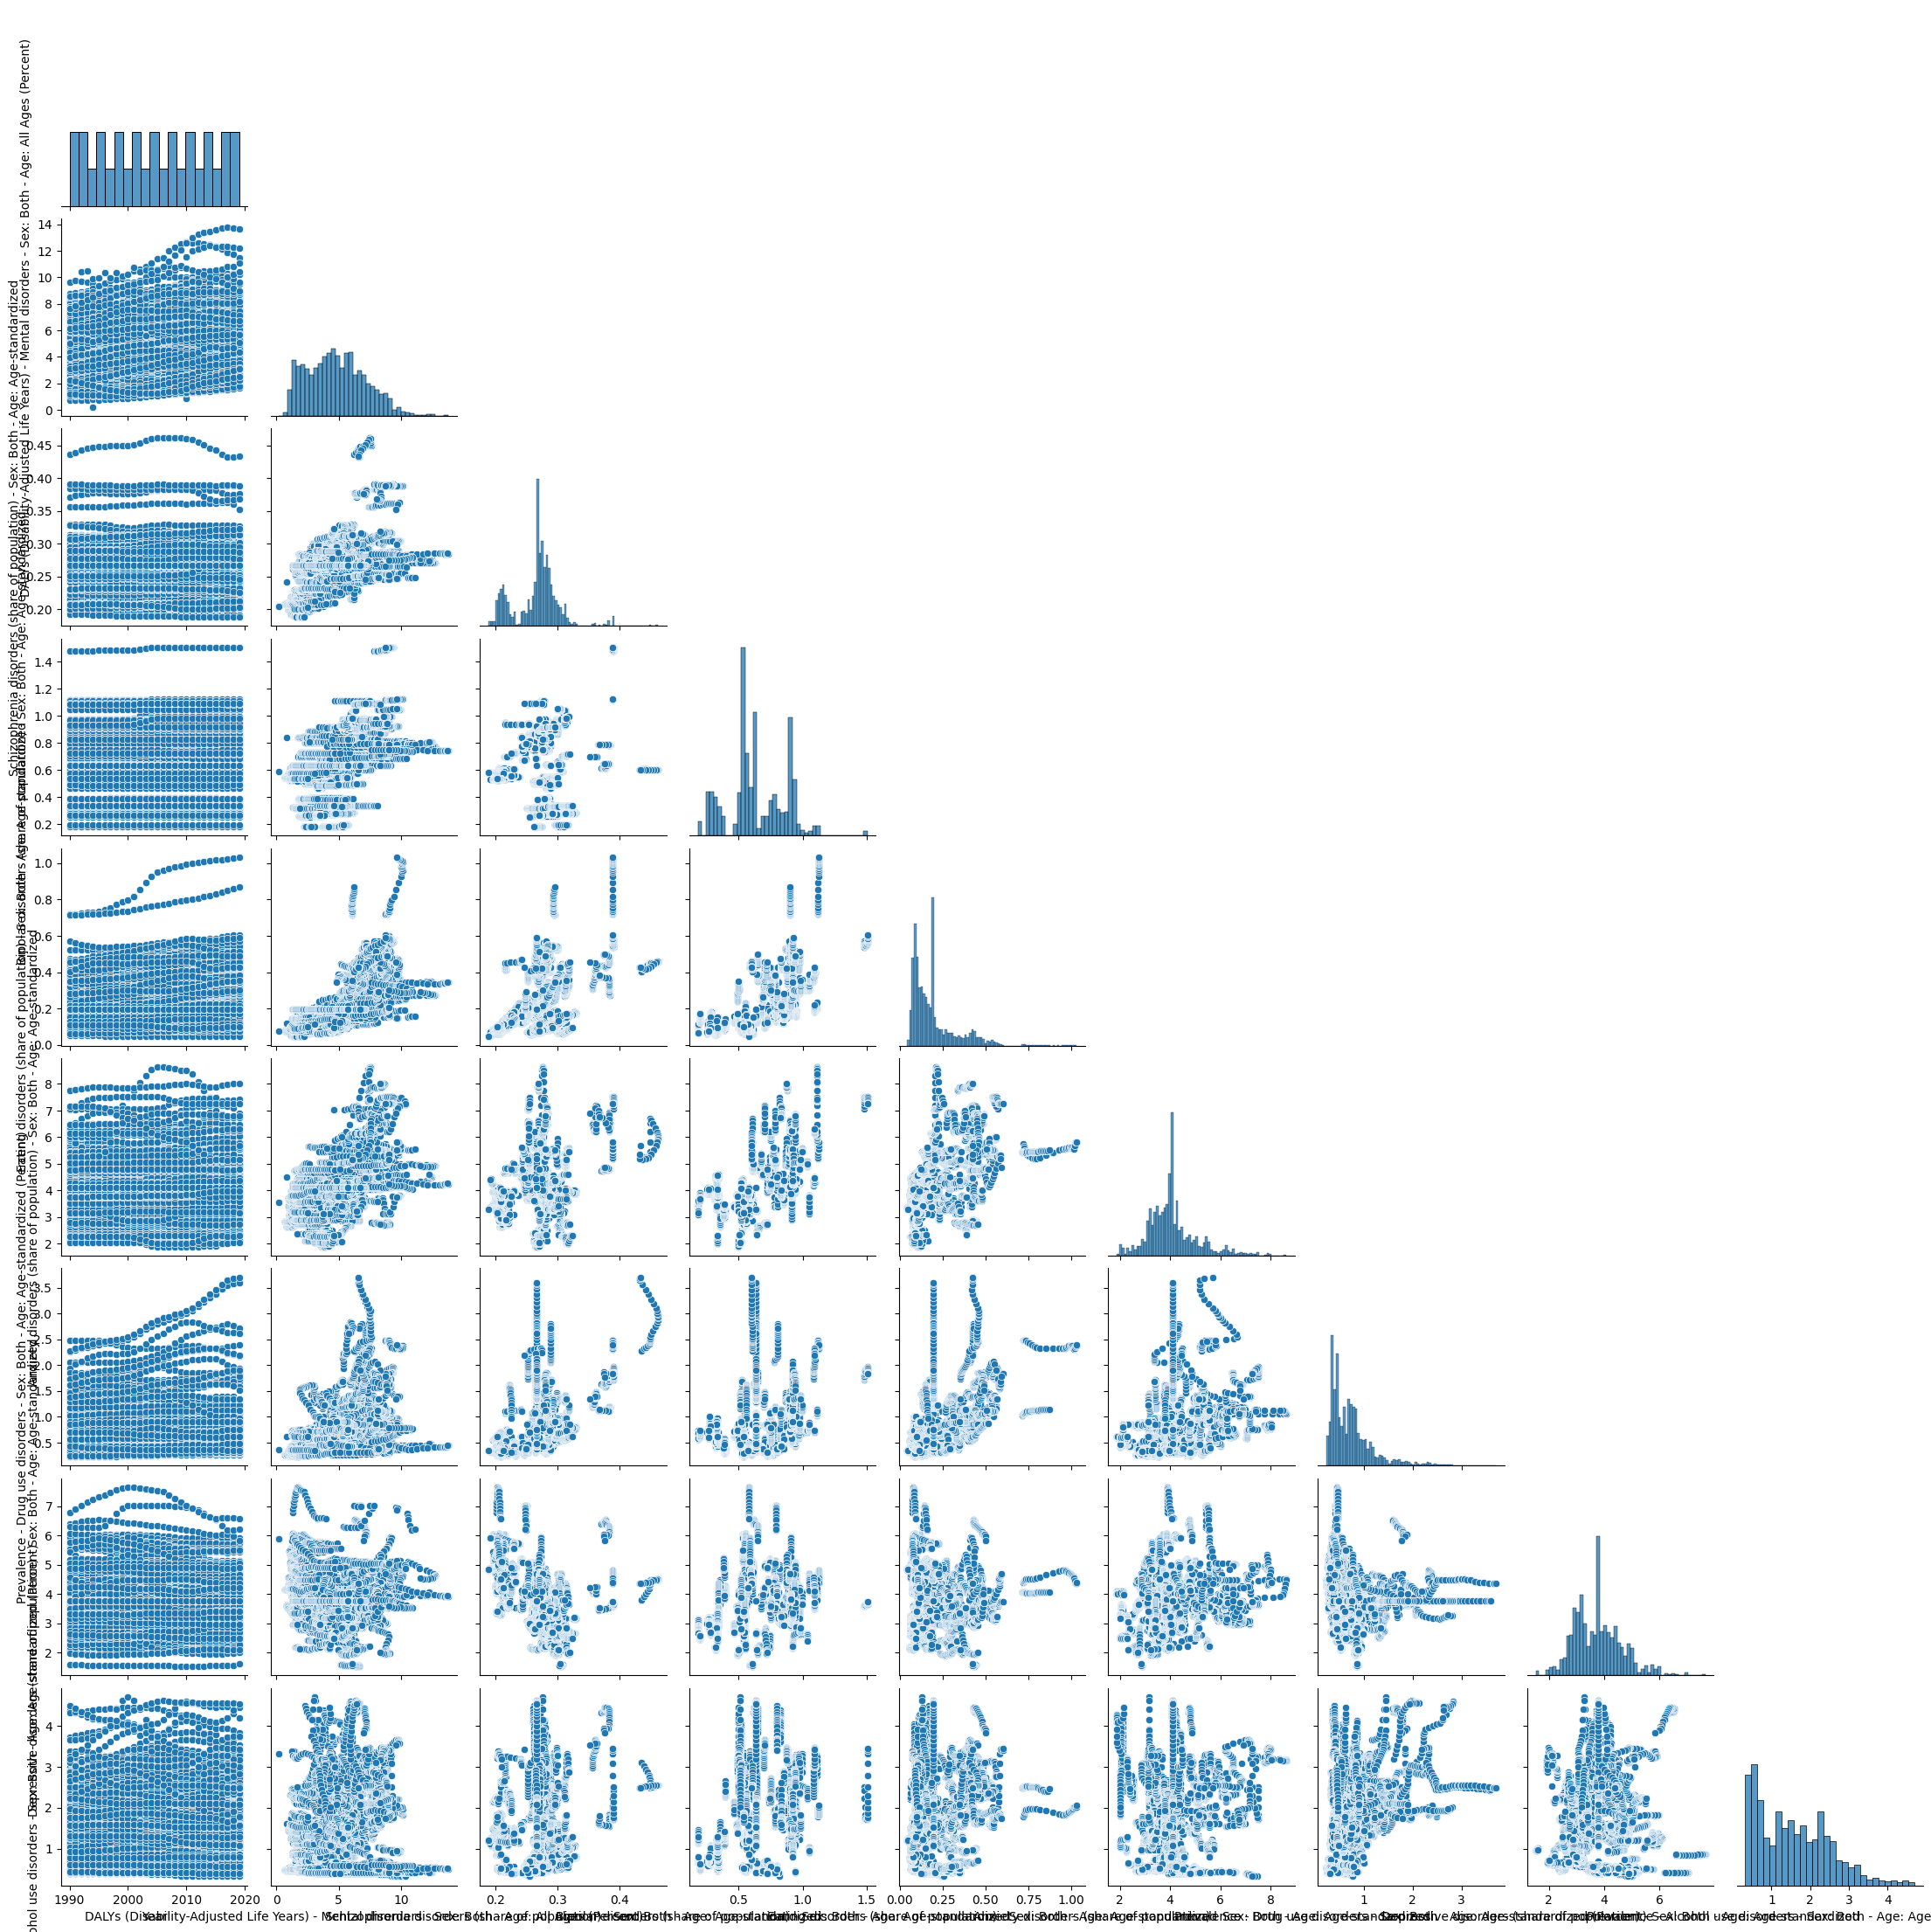

In [231]:
sns.pairplot(merged_df, corner=True)

In [232]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [233]:
y_pred = model.predict(X_test)

In [234]:
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['3. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['4. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['5. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['6. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.8852828652623428
   R-squared Score: 0.6309285836156879

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 3.674451184301676
   R-squared Score: 0.2806729812205011

Model: 3. Decision Tree Regression
   Mean Squared Error (MSE): 0.17014356233755684
   R-squared Score: 0.9666919342992827

Model: 4. Random Forest Regression
   Mean Squared Error (MSE): 0.07598619761677869
   R-squared Score: 0.985124601672874

Model: 5. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10936640935672515
   R-squared Score: 0.978589941939277

Model: 6. Neural Network Regression
   Mean Squared Error (MSE): 0.6816643331016458
   R-squared Score: 0.8665543375203363



# **Predicted Vs Actual**

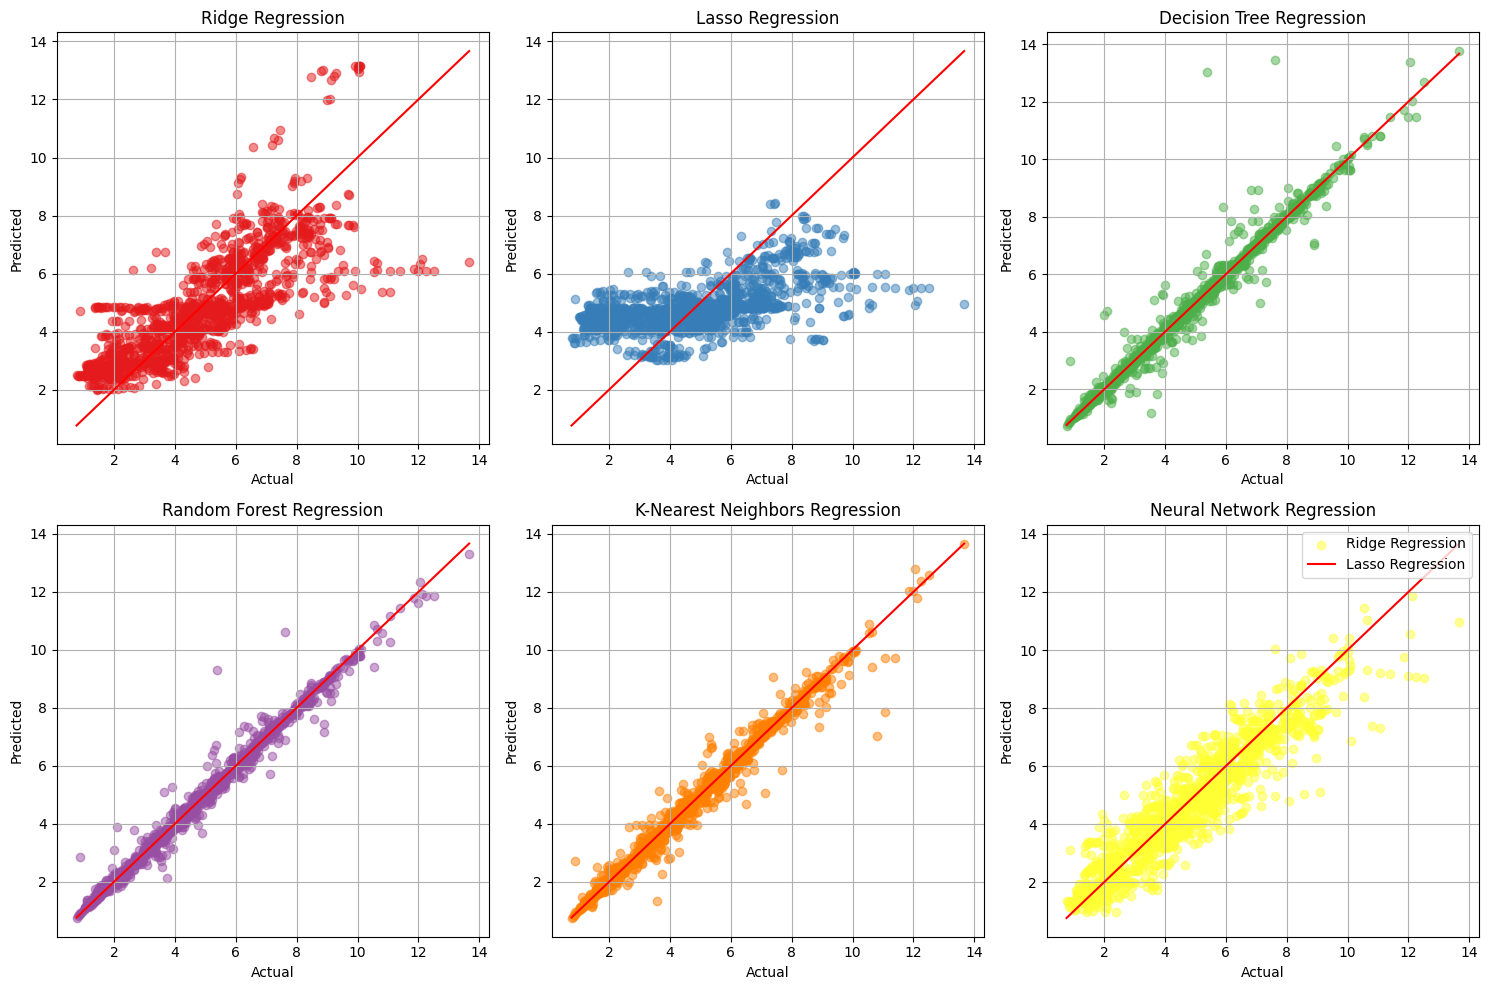

In [235]:
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
   }

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

# **Regression With Most Precision And Least Precision.**

In [236]:
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")

Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.07598619761677869
   R-squared Score: 0.985124601672874

2. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10936640935672515
   R-squared Score: 0.978589941939277

3. Decision Tree Regression
   Mean Squared Error (MSE): 0.17014356233755684
   R-squared Score: 0.9666919342992827

4. Neural Network Regression
   Mean Squared Error (MSE): 0.6816643331016458
   R-squared Score: 0.8665543375203363

5. Ridge Regression
   Mean Squared Error (MSE): 1.8852828652623428
   R-squared Score: 0.6309285836156879

6. Lasso Regression
   Mean Squared Error (MSE): 3.674451184301676
   R-squared Score: 0.2806729812205011

The most precise model is: Random Forest Regression
The least precise model is: Lasso Regression


In [237]:
import pickle

In [239]:
log_reg = LogisticRegression()

In [240]:
pickle.dump(log_reg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))